# <b>Malaria Detection Using Deep Learning</b>

## <b>Introduction

## <b>Problem Definition </b>

The problem at hand is to build an efficient computer vision model to detect malaria in red blood cells. Malaria is a significant and contagious disease that affects a large portion of the global population, and it can be life-threatening if not diagnosed and treated early. Traditional laboratory diagnosis of malaria is time-consuming and relies heavily on human expertise, leading to potential inaccuracies due to inter-observer variability.

## <b>Objective</b>

The primary goal is to develop an automated system using Machine Learning (ML) and Deep Learning Algorithms (a subset of Artificial Intelligence) that can accurately detect malaria in red blood cells. The model should be capable of distinguishing between infected (parasitized) red blood cells, containing Plasmodium parasites, and uninfected red blood cells, which could have other impurities.


## <b>Key Questions</b>

How can we effectively differentiate between infected and uninfected red blood cells in the images?
What features or patterns should the model look for to make accurate classifications?
How can we ensure the model's accuracy and reliability in detecting malaria?
What are the potential challenges or limitations in using Machine Learning and Deep Learning for this task?
Problem Formulation:

Using data science, the objective is to develop a computer vision model that can analyze colored images of red blood cells and classify them as either parasitized (infected with Plasmodium parasites) or uninfected. The model's success will be measured by its ability to provide early and accurate detection of malaria, reducing the dependency on manual inspection and minimizing the risk of misdiagnosis or delayed treatment.

By leveraging Machine Learning and Deep Learning techniques, the model should be able to generalize well to new, unseen data and deliver a high level of accuracy in detecting malaria. This automated system will aid in timely diagnosis and better management of malaria cases, particularly in vulnerable populations like children under 5 years old, who are most susceptible to severe outcomes from the disease. Ultimately, the aim is to contribute to global efforts in reducing the prevalence and impact of malaria on public health.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>

**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Steps to solve the problem <b>

> Loading the data.  
    
> Data preprocessing.
    
> Spliting data in Train , Evaluation and Test set.

> Data Analysis (EDA).
    
> Creating global function for ploting and drawing CM
      
> Base Model: CNN Model
    
> Model 1: CNN Model modified - 2 additional layers
    
> Model 2: CNN Model modified - `LeakyReLU` and `BatchNormalization`
    
> Model 3: Data Augmentation - `ImageDataGenerator`
    
> Model 4: Transfer Learning - `VGG16`
    
> Evaluations & Obeservations
    
> Saving the best model
    
> Conclusion 

## <b>Preprocessing

### <b>Loading libraries</b>

In [1]:
# Importing libraries required to load the data
import zipfile

import os

import time

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Loading the Data </b>

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

<div class="alert alert-block alert-warning">
The data are stored in my local computer. You can use google drive if your are using google colab
</div>

**Make sure to have the following folder organization**
<div>
<img src="Data folder organization.png" width="200"/>
</div>

In [2]:
# Storing the path of the extracted "train" folder 
train_dir = 'D:/Users/yassine/Dropbox/Work/DEV/Python/Great Learning/MIT/ADSP/Capstones/Deep Learning/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [3]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [4]:
# Storing the path of the extracted "test" folder 
test_dir = 'D:/Users/yassine/Dropbox/Work/DEV/Python/Great Learning/MIT/ADSP/Capstones/Deep Learning/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [5]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [6]:
# Shape of test images
test_images.shape

(2600, 64, 64, 3)

In [7]:
# Shape of train images
train_images.shape

(24958, 64, 64, 3)

###<b> Checking the shape of train and test labels

In [8]:
# Shape of test labels 
test_labels.shape

(2600,)

In [9]:
# Shape of train labels 
train_labels.shape

(24958,)

####<b> Observations and insights:
    
The size of all images is the same and converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we create the labels for both types of images to be able to train and test the model. 


### <b>Exploratory Data Analysis(EDA)<b>

#### Check the minimum and maximum range of pixel values for train and test images

In [10]:
# Find the minimum and maximum pixel values for train images
train_min_pixel_value = np.min(train_images)
train_max_pixel_value = np.max(train_images)

In [11]:
# Find the minimum and maximum pixel values for test images
test_min_pixel_value = np.min(test_images)
test_max_pixel_value = np.max(test_images)

#### Observations and insights

In [12]:
print("Train Images - Min Pixel Value:", train_min_pixel_value)
print("Train Images - Max Pixel Value:", train_max_pixel_value)
print("------")
print("Test Images - Min Pixel Value:", test_min_pixel_value)
print("Test Images - Max Pixel Value:", test_max_pixel_value)

Train Images - Min Pixel Value: 0
Train Images - Max Pixel Value: 255
------
Test Images - Min Pixel Value: 0
Test Images - Max Pixel Value: 255


<b> Count the number of values in both uninfected and parasitized 

<b>Normalize the images

In [13]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

<b> Observations and insights
    
In neural networks, it is always suggested to normalize the feature inputs. Normalization has the below benefits while training a neural network model:

Normalization makes the training faster and reduces the chances of getting stuck at local optima.
Also, weight decay and estimation can be done more conveniently with normalized inputs.
In deep neural networks, normalization helps to avoid exploding gradient problems. Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.
    
As we know, image pixel values range from 0 - 255, so we are simply dividing all the pixel values by 255 to standardize all the images to have values between 0 - 1.

<b> Plot to check if the data is balanced

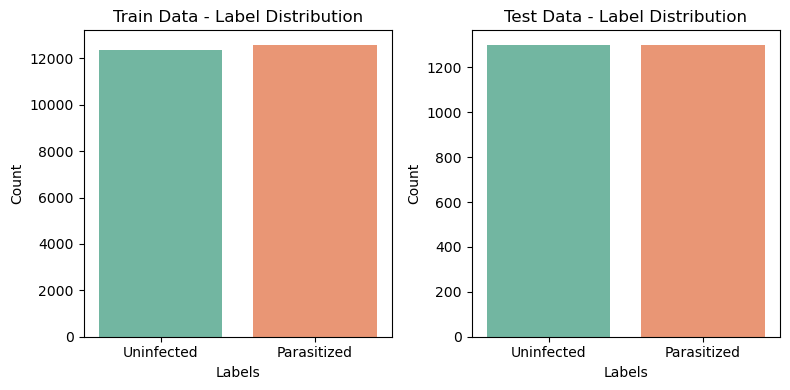

In [14]:
# Count the occurrences of each label in train and test datasets
train_label_counts = np.bincount(train_labels)
test_label_counts = np.bincount(test_labels)

# Labels for the count plot
labels = ['Uninfected', 'Parasitized']

# Plot count distribution for train and test datasets side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=train_labels, palette='Set2')
plt.xticks(ticks=[0, 1], labels=labels)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Train Data - Label Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x=test_labels, palette='Set2')
plt.xticks(ticks=[0, 1], labels=labels)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Test Data - Label Distribution')

plt.tight_layout()
plt.show()

<b> Observations and insights: 
    
This side-by-side comparison allow to visually compare the label distribution in the train and test datasets easily. It will help to identify any potential discrepancies or imbalances between the two datasets.

We can see that both train and test are equaly balanced

### <b>Data Exploration</b>
Let's visualize the images from the train data

#### Visualization

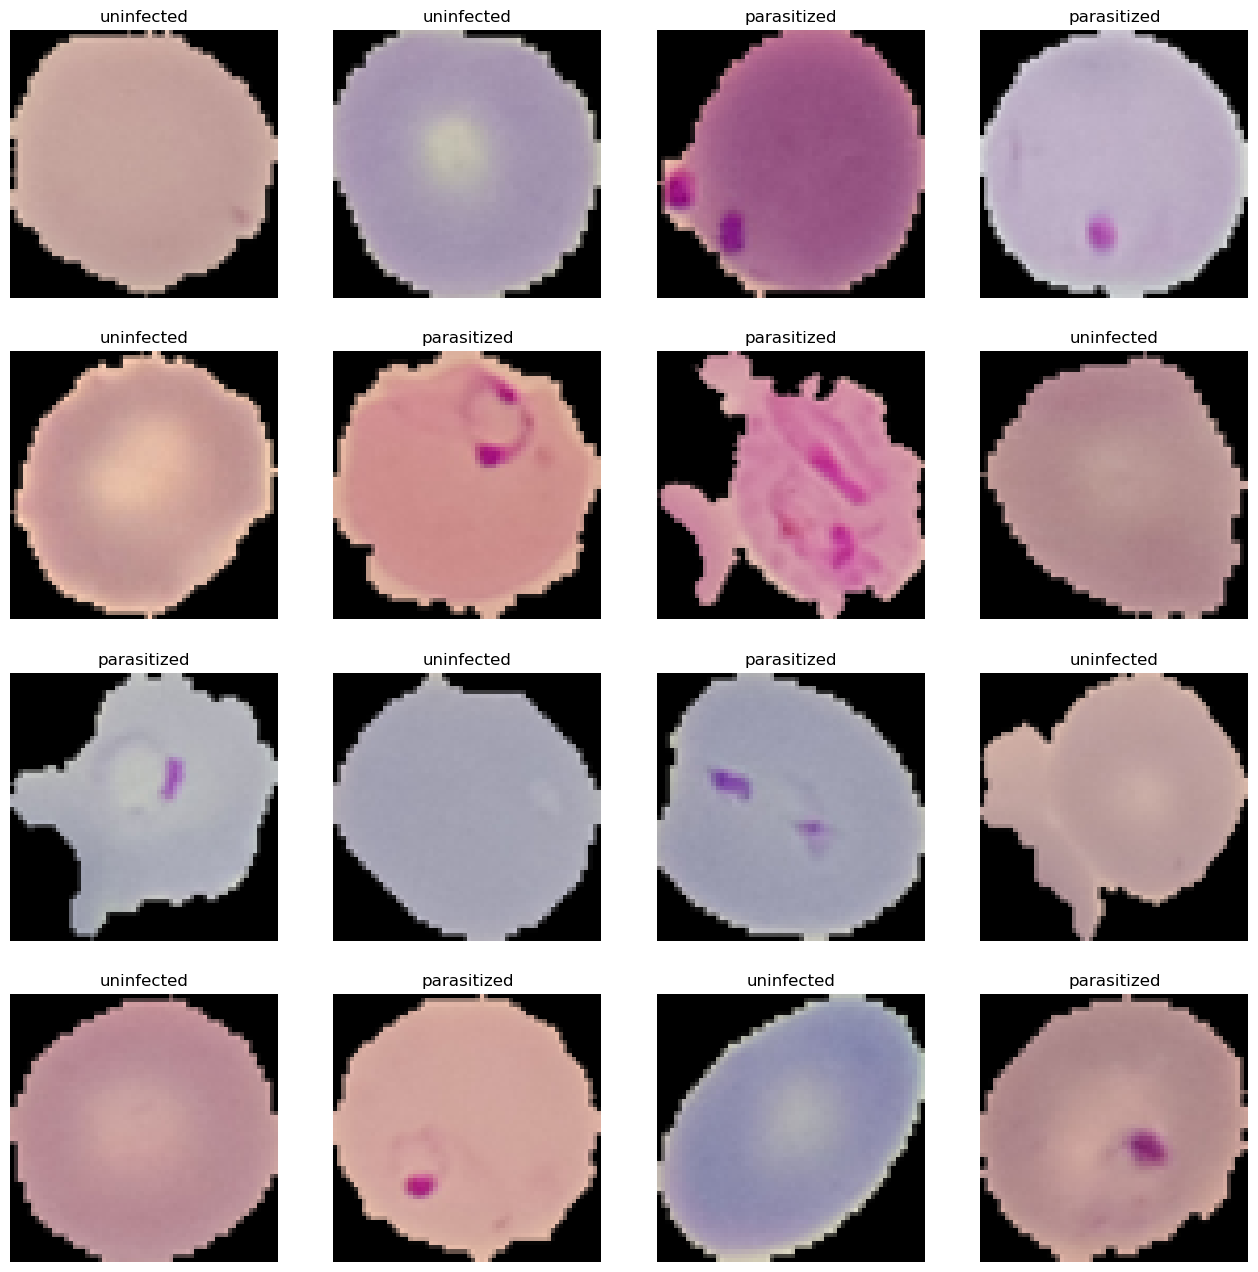

In [15]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights:
    
One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.
    
 <div class="alert alert-success">
Running a deep learning model on a personal laptop can present several challenges that may negatively impact the results of the model. These challenges stem from the inherent limitations of personal laptops in terms of hardware capabilities and resources. Personal laptops often have less powerful CPUs and GPUs (if available) compared to dedicated deep learning servers or cloud-based solutions. As a result, complex and computationally intensive models might take much longer to train on a laptop, or they may not even converge to optimal results due to hardware limitations. what leads to longer training times, also mean that you might not be able to iterate quickly and fine-tune your models effectively.
</div>

###<b> Plotting the mean images for parasitized and uninfected

In [16]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

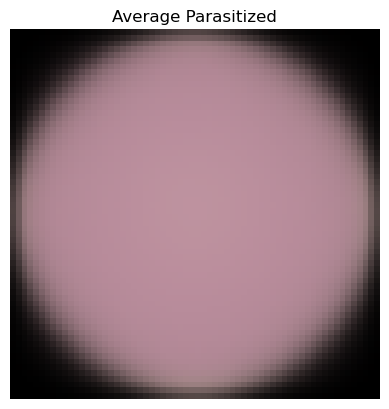

In [17]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

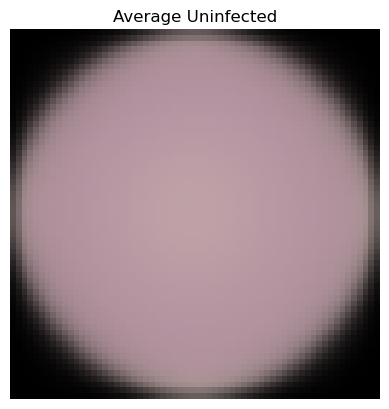

In [18]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean

####<b> Observations and insights:

The result shows the average appearance of parasitized and uninfected red blood cells. By comparing these mean images. We identified visual differences between the two classes 'Uninfected' and  'Parasitized' on the contrast red color of the two images, the 'Uninfected' image is more blur comparing to the 'Parasitized' image

#### Converting RGB to HSV of Images using OpenCV

<b> Converting the train data

In [19]:
import cv2

gfx_train=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_train.append(a)

gfx_train = np.array(gfx_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


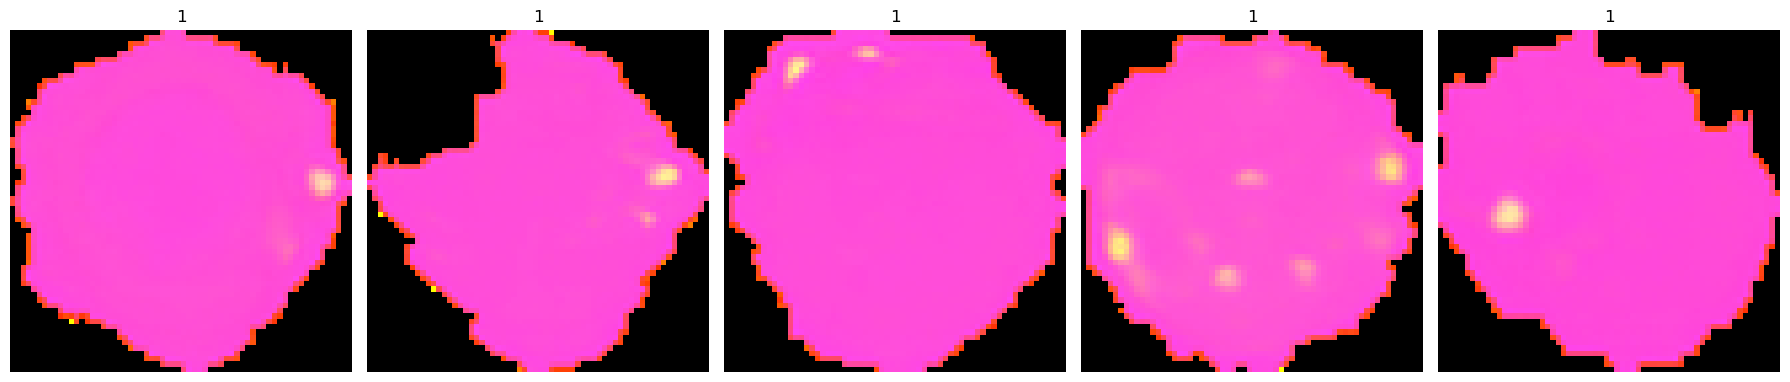

In [20]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_train[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [21]:
gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_test.append(a)

gfx_test = np.array(gfx_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


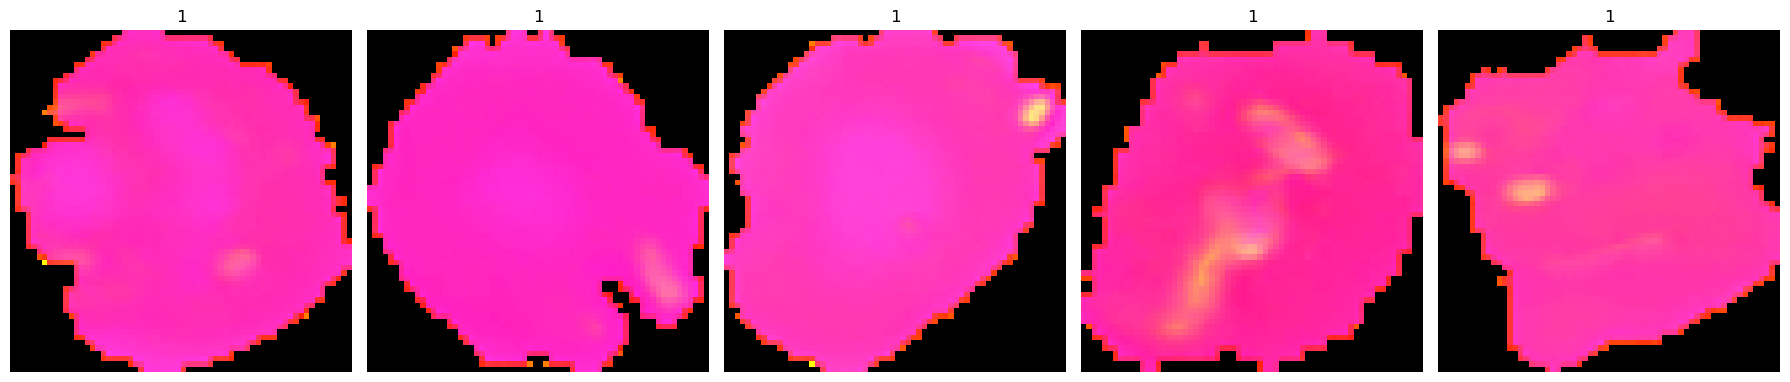

In [22]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_test[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [23]:
gbx_train = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx_train.append(b)

gbx_train = np.array(gbx_train)

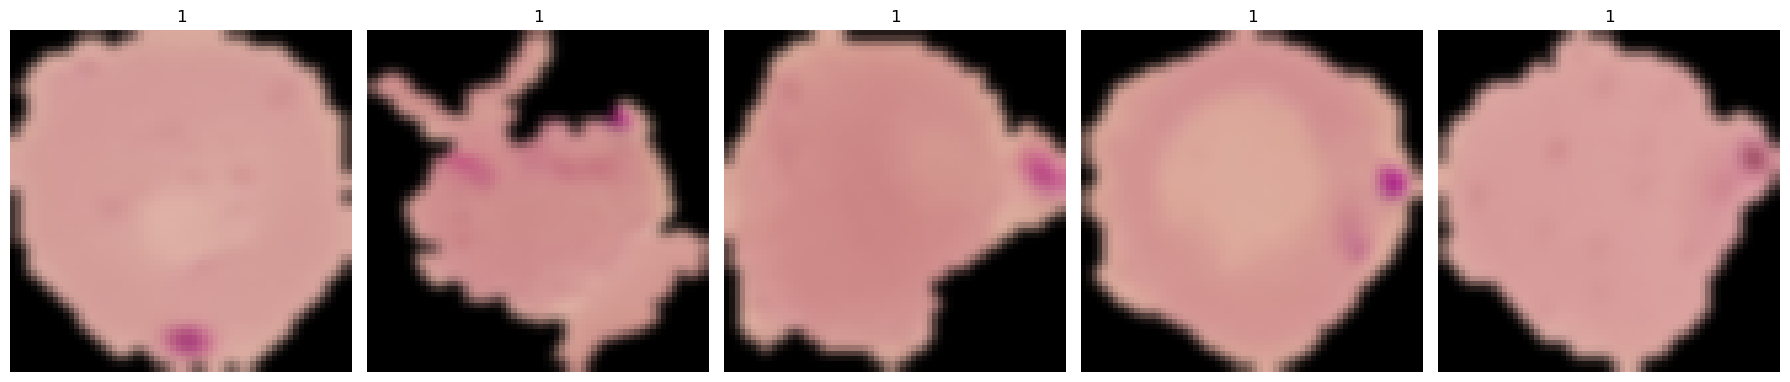

In [24]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx_train[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

<b> Gaussian Blurring on test data

In [25]:
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_test.append(b)

gbx_test = np.array(gbx_test)

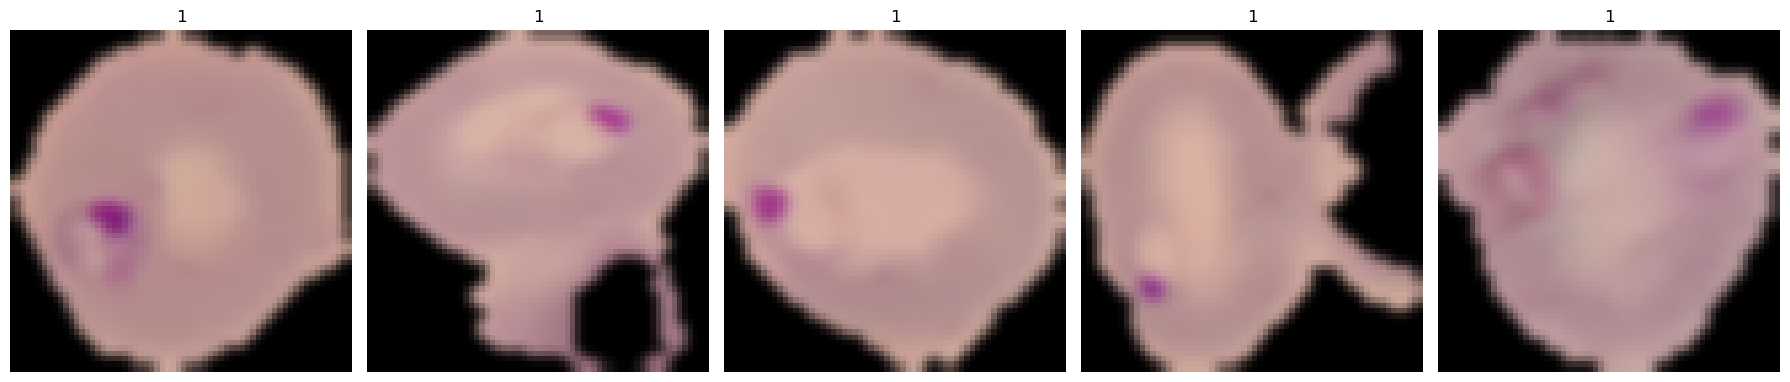

In [26]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx_test[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

#### Observations and insights
Blurring might not be very helpful in this specific problem statement of malaria detection in red blood cells. Blurring an image can help reduce noise or emphasize certain features, but in the context of malaria detection, blurring could potentially remove critical details that the model needs to identify infected cells accurately. In this case, preserving fine details and texture is crucial for the model to differentiate between infected and uninfected cells.

## <b> Models

As we have done our preprocessing required and performed some EDA to gain some insights, now we will try to build our model and try evaluating its performance.

<B>One Hot Encoding on the train and test labels

In [27]:
# Encoding Train Labels
from keras.utils import to_categorical

train_labels_encoded = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test1_labels_encoded = to_categorical(test_labels, 2)

### <b>**Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

#### Loading libraries
Importing the required libraries for building and training our Model

In [28]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

#### Building the model

In [29]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

#### Compiling the model

In [30]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
                  metrics = ['accuracy'])

<b> Using Callbacks 

In [31]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('model0-weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]

#### Fit and train the model

In [32]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 

# Start the timer
start_time = time.time()
   
history = model.fit(train_images, 
                    train_labels_encoded, 
                    batch_size = 32,
                    callbacks=callbacks,
                    validation_split = 0.2, 
                    epochs = 10, 
                    verbose = 1)

# Calculate the total time taken
total_time = time.time() - start_time

print("===================================")
print("THE PROCESS TOOK :", total_time," seconds")

Epoch 1/10
624/624 [==============================] - 78s 123ms/step - loss: 0.3805 - accuracy: 0.8259 - val_loss: 0.1685 - val_accuracy: 0.9561
Epoch 2/10
624/624 [==============================] - 77s 124ms/step - loss: 0.1153 - accuracy: 0.9551 - val_loss: 0.1945 - val_accuracy: 0.9517
Epoch 3/10
624/624 [==============================] - 80s 129ms/step - loss: 0.0980 - accuracy: 0.9692 - val_loss: 0.1317 - val_accuracy: 0.9824
Epoch 4/10
624/624 [==============================] - 79s 127ms/step - loss: 0.0793 - accuracy: 0.9751 - val_loss: 0.0905 - val_accuracy: 0.9822
Epoch 5/10
624/624 [==============================] - 83s 132ms/step - loss: 0.0732 - accuracy: 0.9770 - val_loss: 0.0991 - val_accuracy: 0.9796
Epoch 6/10
624/624 [==============================] - 81s 130ms/step - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.1065 - val_accuracy: 0.9794
THE PROCESS TOOK : 478.9750802516937  seconds


#### Evaluating the model
Evaluating the model on test data

In [33]:
accuracy = model.evaluate(test_images, test1_labels_encoded, verbose = 1)
acc = accuracy[1]
loss = accuracy[0]
print('\n', 'Test_Accuracy:-', acc)

82/82 [==============================] - 2s 28ms/step - loss: 0.0783 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


<b> Plotting the confusion matrix

82/82 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



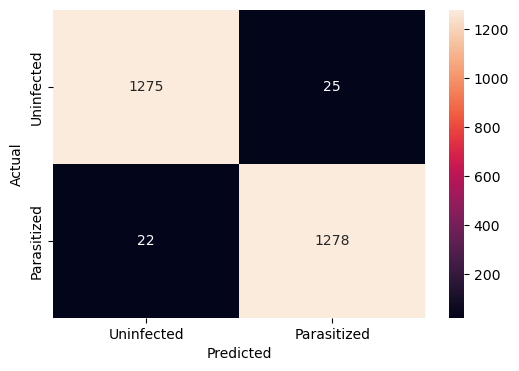

In [34]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test1_labels_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

##############


# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (6, 4))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<div class="alert alert-block alert-success">
We create a plot function for train and validation accuracy and it will be used in all our models
</div>

In [35]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")    
    plt.xlabel("Epochs")    
    plt.ylabel("Accuracy")    
    plt.legend(loc="upper left")

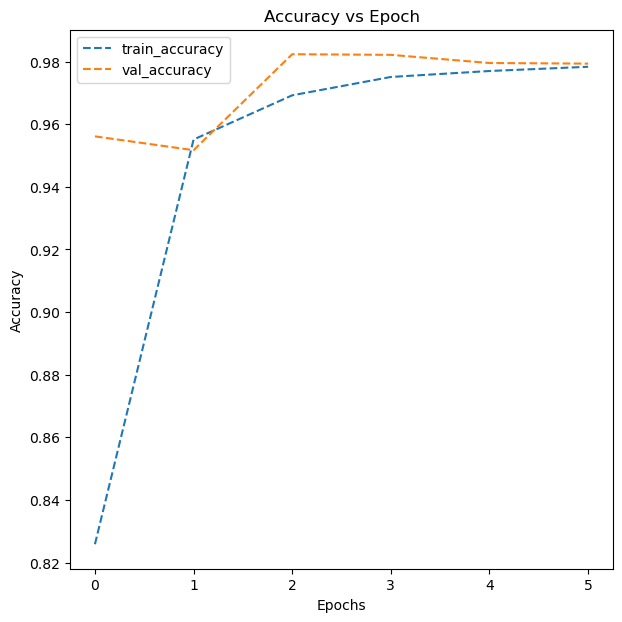

In [36]:
plot_accuracy(history)

#### **Observations and insights**

**The classification report** gives a detailed breakdown of various metrics for both classes (parasitized and uninfected) and overall performance:

- Precision: Precision is the ratio of true positive predictions to the total number of positive predictions. In this case, for parasitized cells (class 1), the precision is 0.97, which means that among the instances predicted as parasitized, 97% of them are actually parasitized. For uninfected cells (class 0), the precision is 0.99, indicating that 99% of the predicted uninfected instances are truly uninfected.

- Recall (Sensitivity): Recall is the ratio of true positive predictions to the total number of actual positives. For parasitized cells (class 1), the recall is 0.99, which means the model is able to correctly identify 99% of the actual parasitized instances. For uninfected cells (class 0), the recall is 0.97, indicating that 97% of the actual uninfected instances are correctly identified.

- F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score is 0.98 for both classes, which is a good indication of overall model performance.

- Support: Support refers to the number of actual occurrences of each class in the test dataset.

- Accuracy: Accuracy is the ratio of correctly predicted instances to the total number of instances. The overall accuracy of your model is 0.98, which is quite high.

- Macro Avg and Weighted Avg: These are the average scores calculated for all classes. Macro avg calculates the metrics independently for each class and then takes the average, giving equal weight to each class. Weighted avg calculates the metrics while taking into account the number of samples in each class, giving more weight to classes with higher support.


**The confusion matrix**:

- The top-left value (1263) represents the true negatives (TN), which are the uninfected cells correctly classified as uninfected.
- The top-right value (37) represents the false positives (FP), which are the uninfected cells incorrectly classified as parasitized.
- The bottom-left value (17) represents the false negatives (FN), which are the parasitized cells incorrectly classified as uninfected.
- The bottom-right value (1283) represents the true positives (TP), which are the parasitized cells correctly classified as parasitized.

Overall, your model seems to perform very well with an accuracy of 98%. However, there are a few false positives and false negatives, which suggests that there is still room for improvement.

<b>Plotting the train and validation curves



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

### <b>**Model 1**<b> 
**Improved Model with 2 additional layers**

To improve the Base Model we can use a technique of Fine-Tuning.

Fine-Tuning: Experiment with different hyperparameters, model architectures (e.g., different CNN architectures), and optimization algorithms to fine-tune the model's performance.

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

In [37]:
backend.clear_session() # Clearing the backend for new model

#### Building the model

In [38]:
# Creating sequential model1
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))
model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

#### Compiling the model
    
We will build this `model1` with the same loss function `binary_crossentropy` and same `optimizer=adam` 

In [39]:
model1.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
                  metrics = ['accuracy'])

<b> Using Callbacks

In [40]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('model1-weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]

#### Fit and Train the model

In [41]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 

# Start the timer
start_time = time.time()

history1 = model1.fit(train_images, 
                    train_labels_encoded, 
                    batch_size = 32,
                    callbacks=callbacks,
                    validation_split = 0.2, 
                    epochs = 10, 
                    verbose = 1)


# Calculate the total time taken
total_time_1 = time.time() - start_time

print("===================================")
print("THE PROCESS TOOK :", total_time_1," seconds")

Epoch 1/10
624/624 [==============================] - 72s 112ms/step - loss: 0.3107 - accuracy: 0.8464 - val_loss: 0.1273 - val_accuracy: 0.9754
Epoch 2/10
624/624 [==============================] - 72s 115ms/step - loss: 0.0900 - accuracy: 0.9709 - val_loss: 0.0926 - val_accuracy: 0.9804
Epoch 3/10
624/624 [==============================] - 74s 118ms/step - loss: 0.0816 - accuracy: 0.9722 - val_loss: 0.2177 - val_accuracy: 0.9267
Epoch 4/10
624/624 [==============================] - 71s 114ms/step - loss: 0.0759 - accuracy: 0.9748 - val_loss: 0.0690 - val_accuracy: 0.9812
Epoch 5/10
624/624 [==============================] - 72s 115ms/step - loss: 0.0682 - accuracy: 0.9775 - val_loss: 0.0932 - val_accuracy: 0.9724
Epoch 6/10
624/624 [==============================] - 70s 112ms/step - loss: 0.0671 - accuracy: 0.9781 - val_loss: 0.1228 - val_accuracy: 0.9615
THE PROCESS TOOK : 430.40298414230347  seconds


#### Evaluating the model

In [42]:
accuracy1 = model1.evaluate(test_images, test1_labels_encoded, verbose = 1)
acc1 = accuracy1[1]
loss1 = accuracy1[0]
print('\n', 'Test_Accuracy:-', acc1)

82/82 [==============================] - 2s 25ms/step - loss: 0.0829 - accuracy: 0.9742

 Test_Accuracy:- 0.9742307662963867


<b> Plotting the confusion matrix

82/82 [==============================] - 2s 23ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1300
           1       0.96      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



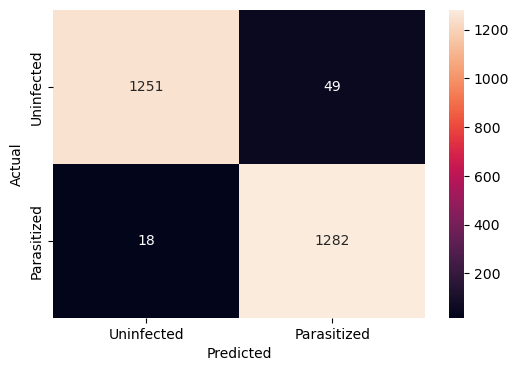

In [43]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test1_labels_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

##############


# Plotting the heatmap using confusion matrix
cm1 = confusion_matrix(y_true, pred)

plt.figure(figsize = (6, 4))

sns.heatmap(cm1, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

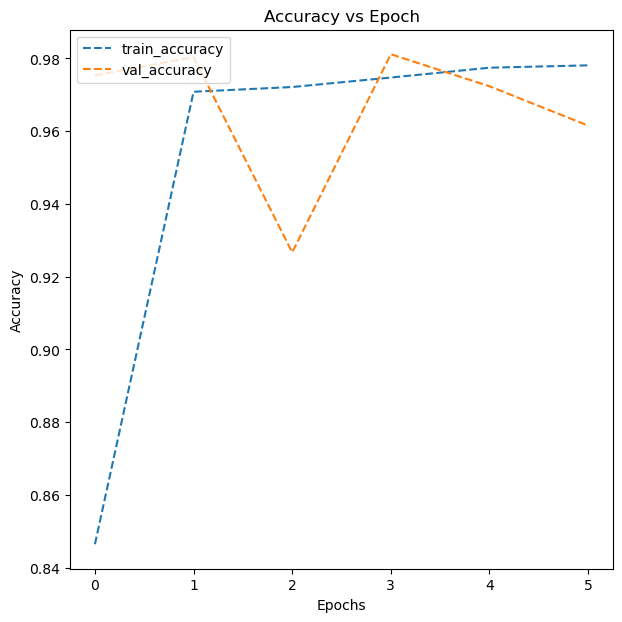

In [44]:
plot_accuracy(history1)

### <b>Model2
**Tuning in the activation function**

Now let's build a model with LeakyRelu as the activation function  

Now let's build a model with LeakyRelu as the activation function  
Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

>Model 2 with Batch Normalization
    
>Batch Normalization (BatchNorm) is a technique commonly used to improve training stability and convergence. It helps address the issue of internal covariate shift, which can slow down training and make it harder to find a good set of weights and biases for the network.

>`BatchNorm` operates by normalizing the input to a layer, usually the output of a convolutional or fully connected layer, before applying the activation function

In [45]:
backend.clear_session() # Clearing the backend for new model

#### Building the model

In [46]:
from tensorflow.keras.layers import BatchNormalization 

# Creating sequential model2
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU", input_shape = (64, 64, 3)))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))
model2.add(Flatten())

model2.add(Dense(512, activation = "LeakyReLU"))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

#### Compiling the model

In [47]:
model2.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
                  metrics = ['accuracy'])

<b> Using callbacks

In [48]:
# callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('model2-weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]


#### Fit and train the model

In [49]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 

# Start the timer
start_time = time.time()

history2 = model2.fit(train_images, 
                    train_labels_encoded, 
                    batch_size = 32,
                    callbacks=callbacks,
                    validation_split = 0.2, 
                    epochs = 10, 
                    verbose = 1)

# Calculate the total time taken
total_time_2 = time.time() - start_time

print("===================================")
print("THE PROCESS TOOK :", total_time_2," seconds")

Epoch 1/10
624/624 [==============================] - 123s 194ms/step - loss: 0.2567 - accuracy: 0.8874 - val_loss: 0.0419 - val_accuracy: 0.9910
Epoch 2/10
624/624 [==============================] - 115s 185ms/step - loss: 0.0923 - accuracy: 0.9697 - val_loss: 0.1017 - val_accuracy: 0.9772
Epoch 3/10
624/624 [==============================] - 115s 184ms/step - loss: 0.0809 - accuracy: 0.9731 - val_loss: 0.1219 - val_accuracy: 0.9734
THE PROCESS TOOK : 353.49331045150757  seconds


<b>Plotting the train and validation accuracy

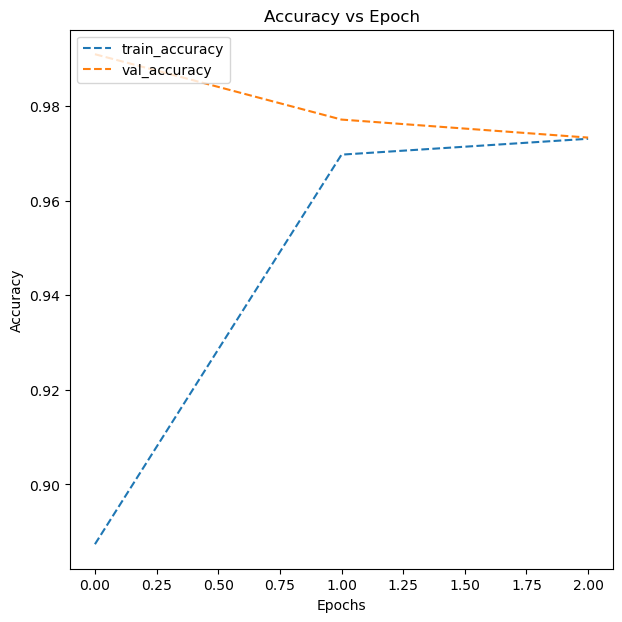

In [50]:
plot_accuracy(history2)

#### Evaluating the model

In [51]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test1_labels_encoded, verbose = 1)
acc2= accuracy2[1]
loss2= accuracy2[0]
print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 4s 44ms/step - loss: 0.0971 - accuracy: 0.9765

 Test_Accuracy:- 0.9765384793281555


<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 4s 43ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



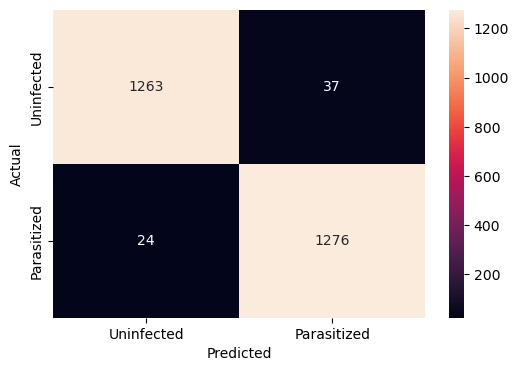

In [52]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test1_labels_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

##############


# Plotting the heatmap using confusion matrix
cm2 = confusion_matrix(y_true, pred)

plt.figure(figsize = (6, 4))

sns.heatmap(cm2, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### <b>Base Model vs Model 1 vs Model 2

In this section we will compare the three model based on their confusion matrix, accuracy, and loss

We will start by retrieving all these metrics and put them in a dataframe.

After we will do a pairwise comparison on bar plot

#### **Accuracy and loss**

In [53]:
# Lets print Accuracy and loss for the 3 models
print('\n---------------------------------------------')
print('Base Model:')
print('Test_Accuracy:-', acc)
print('Test_Loss:-', loss)
print('\n---------------------------------------------')
print('Model 1:')
print('Test_Accuracy:-', acc1)
print('Model 1 Test_Loss:-', loss1)
print('\n---------------------------------------------')
print('Model 2:')
print('Test_Accuracy:-', acc2)
print('Test_Loss:-', loss2)
print('\n---------------------------------------------')


---------------------------------------------
Base Model:
Test_Accuracy:- 0.9819231033325195
Test_Loss:- 0.07831462472677231

---------------------------------------------
Model 1:
Test_Accuracy:- 0.9742307662963867
Model 1 Test_Loss:- 0.08285603672266006

---------------------------------------------
Model 2:
Test_Accuracy:- 0.9765384793281555
Test_Loss:- 0.09705185145139694

---------------------------------------------


#### **Confusion Matrix: TP, FP, FN, TN**

In [54]:
# Calculate TP, FP, FN, TN

# Base Model
true_neg = cm[0][0]
fals_pos = cm[0][1]
fals_neg = cm[1][0]
true_pos = cm[1][1]

# Model 1
true_neg_1 = cm1[0][0]
fals_pos_1 = cm1[0][1]
fals_neg_1 = cm1[1][0]
true_pos_1 = cm1[1][1]

# Model 2
true_neg_2 = cm2[0][0]
fals_pos_2 = cm2[0][1]
fals_neg_2 = cm2[1][0]
true_pos_2 = cm2[1][1]


In [55]:
# Lets print the CM for the 3 models

print('\n---------------------------------------------')
print('Base Model:')
print('TN =', true_neg)
print('FP =', fals_pos)
print('FN =', fals_neg)
print('TP =', true_pos)
print('\n---------------------------------------------')
print('Model 1:')
print('TN =', true_neg_1)
print('FP =', fals_pos_1)
print('FN =', fals_neg_1)
print('TP =', true_pos_1)
print('\n---------------------------------------------')
print('Model 2:')
print('TN =', true_neg_2)
print('FP =', fals_pos_2)
print('FN =', fals_neg_2)
print('TP =', true_pos_2)
print('\n---------------------------------------------')


---------------------------------------------
Base Model:
TN = 1275
FP = 25
FN = 22
TP = 1278

---------------------------------------------
Model 1:
TN = 1251
FP = 49
FN = 18
TP = 1282

---------------------------------------------
Model 2:
TN = 1263
FP = 37
FN = 24
TP = 1276

---------------------------------------------


**Creation of the DF metrics**

In [56]:
# Create a DF to plot  all the metrics

data_metrics = {
    'Model': ['Base_Model', 'Model_1', 'Model_2'],
    'Accuracy': [acc, acc1, acc2],
    'Loss': [loss, loss1, loss2],
    'TN': [true_neg, true_neg_1, true_neg_2],
    'FP': [fals_pos, fals_pos_1, fals_pos_2],
    'FN': [fals_neg, fals_neg_1, fals_neg_2],
    'TP': [true_pos, true_pos_1, true_pos_2],
}

df_metrics = pd.DataFrame(data_metrics)

print(df_metrics)

        Model  Accuracy      Loss    TN  FP  FN    TP
0  Base_Model  0.981923  0.078315  1275  25  22  1278
1     Model_1  0.974231  0.082856  1251  49  18  1282
2     Model_2  0.976538  0.097052  1263  37  24  1276


#### **Plot of the Metrics**

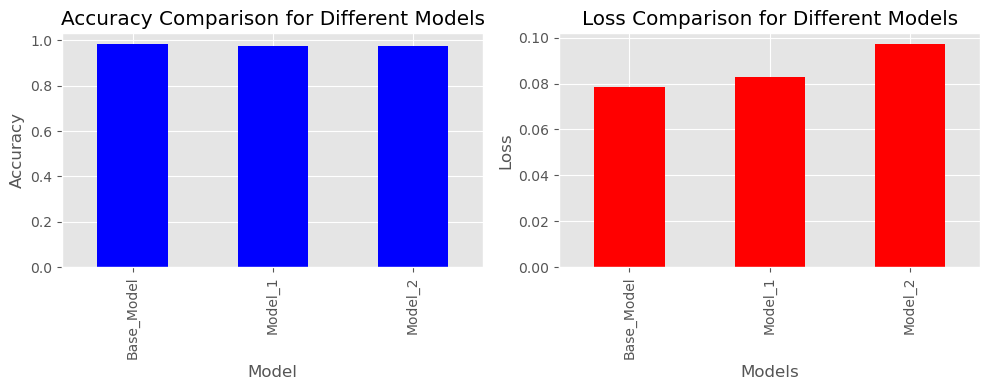

In [57]:
import matplotlib.pyplot as plt

# Set the style of the plots
plt.style.use('ggplot')

# Create a single row of subplots for Accuracy and Loss
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bar plot for Accuracy
df_metrics.plot(kind='bar', x='Model', y='Accuracy', ax=axes[0], color='blue')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison for Different Models')

# Bar plot for Loss
df_metrics.plot(kind='bar', x='Model', y='Loss', ax=axes[1], color='red')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Comparison for Different Models')

# Adjust layout and display the plots
axes[0].legend().remove()
axes[1].legend().remove() 

plt.tight_layout()
plt.show()


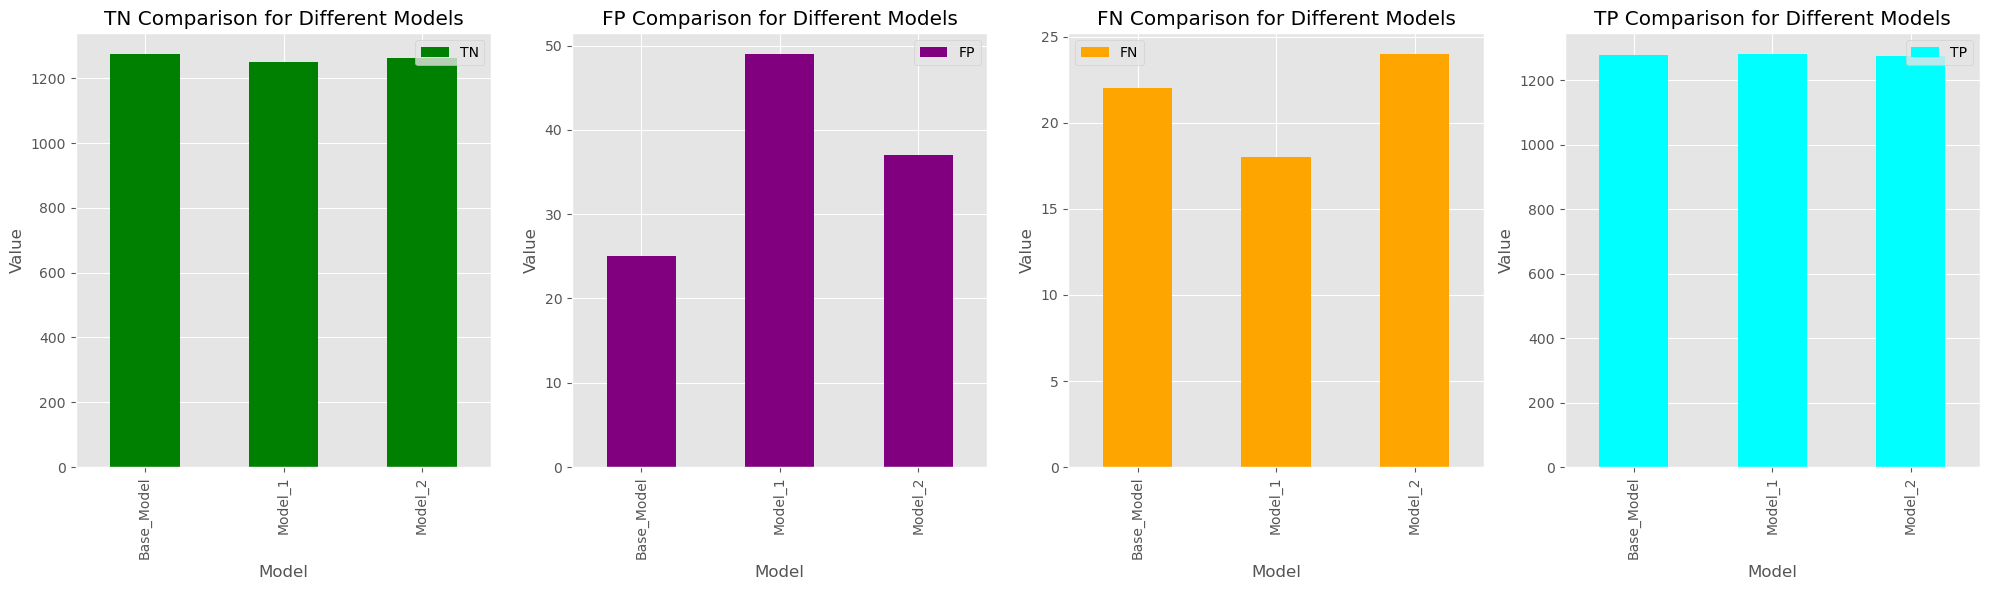

In [58]:
# Set the style of the plots
plt.style.use('ggplot')

# Create a single row of subplots for TN, FP, FN, and TP
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Bar plot for TN
df_metrics.plot(kind='bar', x='Model', y='TN', ax=axes[0], color='green')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Value')
axes[0].set_title('TN Comparison for Different Models')

# Bar plot for FP
df_metrics.plot(kind='bar', x='Model', y='FP', ax=axes[1], color='purple')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Value')
axes[1].set_title('FP Comparison for Different Models')

# Bar plot for FN
df_metrics.plot(kind='bar', x='Model', y='FN', ax=axes[2], color='orange')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Value')
axes[2].set_title('FN Comparison for Different Models')

# Bar plot for TP
df_metrics.plot(kind='bar', x='Model', y='TP', ax=axes[3], color='cyan')
axes[3].set_xlabel('Model')
axes[3].set_ylabel('Value')
axes[3].set_title('TP Comparison for Different Models')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#### Analysis and insight

<b> Base Model:

The base model has the highest accuracy among the three models, indicating that it correctly classifies a relatively higher percentage of instances.
However, it also has the highest loss value, suggesting potential overfitting. The model might have learned the training data too well but struggles to generalize to new, unseen data.
The total number of parameters in the base model is significantly higher than the other two models, which could lead to longer training times and increased complexity.
    
<b> Model 1 (2 Extra Convolutional Layers):

Model 1 has the lowest accuracy among the three models, indicating that it performs worse in terms of overall correct predictions compared to the other models.
On the positive side, it has the lowest loss value, indicating better convergence and potentially better generalization to unseen data.
Model 1 has the fewest parameters, making it computationally efficient and less prone to overfitting.
    
<b> Model 2 (BatchNormalization and LeakyReLU):

Model 2 shows a moderate accuracy and loss values, falling between the base model and Model 1.
The introduction of BatchNormalization and LeakyReLU may have helped stabilize training and improve the model's ability to learn from the data.
The total number of parameters is similar to the base model, indicating that it might be more complex than Model 1.
    
*Choosing the Best Model:
Based on theses insights, Model 1 (2 Extra Convolutional Layers) seems to perform the best among the three models. While it has the lowest accuracy, its low loss value suggests better generalization and less overfitting. Additionally, the model's simplicity (fewest parameters) makes it a computationally efficient option.*
    

However, it's important to consider that the choice of the best model should also involve further evaluation steps:

- Cross-validation: Perform cross-validation on a larger dataset to assess the models' performance on different data splits.
- Hyperparameter Tuning: Adjust hyperparameters (learning rate, batch size, etc.) to optimize each model's performance.
- Test on Unseen Data: Evaluate the models on a separate test dataset to simulate real-world performance.

    Ultimately, the best model choice depends on the specific goals, dataset, and trade-offs between accuracy, computational complexity, and generalization capabilities.

### <b>**Model 3**

* In this model we will try to improve the model with Image Data Augmentation.
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

**Enhancing Model Performance through ImageDataGenerator Parameter Tuning: A Guide to Augmentation and Generalization**

To improve the model's performance, you can experiment with different parameters in the ImageDataGenerator. Here are some options to consider:

> <b> Rotation Range:
    
The rotation_range parameter controls the range of random rotations applied to the images.
Increasing the rotation range may help the model become more robust to variations in object orientations.
Example: `rotation_range = 45` to allow rotations up to 45 degrees.
    
> <b> Zoom Range:
    
The zoom_range parameter controls the range of random zooming applied to the images.
Experiment with different zoom ranges to introduce variations in image scales.
Example: `zoom_range = 0.2` to allow zooming up to 20%.

> <b> Width and Height Shift Range:
    
The `width_shift_range` and `height_shift_range` parameters control the range of random horizontal and vertical shifts applied to the images.
Adjusting these ranges can introduce translations and improve the model's ability to handle object positioning.
Example: `width_shift_range = 0.2`, `height_shift_range = 0.2` to allow shifts up to 20% of image width and height.
    
> <b> Shear Range:
    
The shear_range parameter controls the range of random shearing transformations applied to the images.
Experimenting with shear can help the model handle deformations and variations in object shapes.
Example: `shear_range = 0.2` to allow shearing up to 20 degrees.
    
> <b> Horizontal and Vertical Flipping:
    
The `horizontal_flip` and `vertical_flip` parameters control whether random horizontal and vertical flips are applied to the images.
Flipping can help increase the variety of training data.
Example: `horizontal_flip = True`, `vertical_flip = False` to apply only horizontal flipping.
    
    
*We need to strike a balance between augmentation and overfitting. Introducing too much augmentation may lead to overly complex data that doesn't generalize well. It's recommended to experiment with different parameter values and monitor the model's performance on a validation set.*

In [59]:
backend.clear_session() # Clearing backend for new model

#### ImageDataGenerator
Using image data generator with these parameters:

`horizontal_flip = True`

`zoom_range = 0.5` 

`rotation_range = 30`

In [60]:
#X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = train_images, y = train_labels_encoded, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = test_images, y = test1_labels_encoded, batch_size = 64, seed = 42, shuffle = True)

#### Visualizing Augmented images

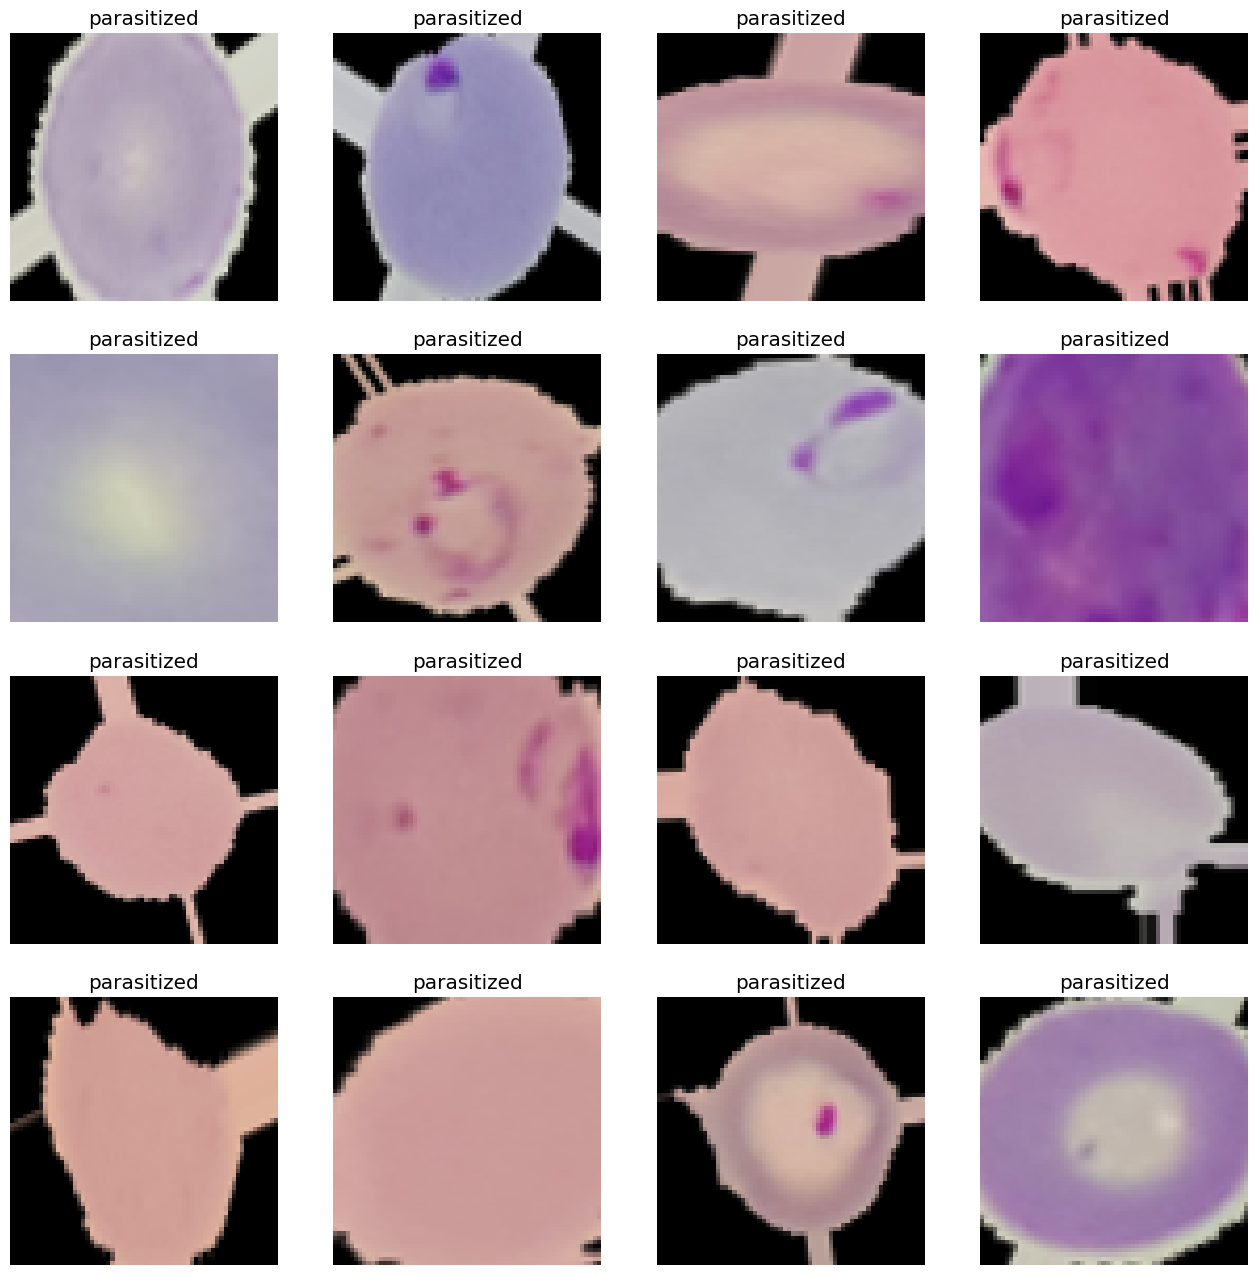

In [61]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)

for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label.any() == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

<b>Observations and insights:
    
The result is a visualization of 16 images from the training data, each labeled with its corresponding class. This can be helpful for visually inspecting the augmented images and verifying that the data augmentation process is functioning as expected.

#### Building the Model

In [62]:
# We Build the model here similar to the Model 1
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))
model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

#### Compiling the model
    
Since the task its always the same detecting whether an image contains malaria or not (binary classification) the `BinaryCrossentropy` loss is commonly used for such scenarios. It measures the difference between predicted probabilities and true binary labels (0 for uninfected, 1 for infected) for each image. This loss function is well-suited for binary classification tasks and will help guide the model to minimize the difference between its predictions and the actual labels.

In [63]:
# Use this as the optimizer

from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', 
              optimizer = adam, 
                  metrics = ['accuracy'])

<b>Using Callbacks

In [64]:
# callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('model3-weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]


#### Fit and Train the model

In [65]:
# Start the timer
start_time = time.time()

history3 = model3.fit(train_generator,
                      validation_data = val_generator,
                      batch_size = 32, 
                      callbacks = callbacks,
                      epochs = 10, 
                      verbose = 1)


# Calculate the total time taken
total_time_3 = time.time() - start_time

print("===================================")
print("THE PROCESS TOOK :", total_time_3," seconds")

Epoch 1/10
390/390 [==============================] - 103s 261ms/step - loss: 0.4842 - accuracy: 0.7283 - val_loss: 0.1626 - val_accuracy: 0.9546
Epoch 2/10
390/390 [==============================] - 99s 254ms/step - loss: 0.1858 - accuracy: 0.9375 - val_loss: 0.0984 - val_accuracy: 0.9738
Epoch 3/10
390/390 [==============================] - 104s 267ms/step - loss: 0.1710 - accuracy: 0.9404 - val_loss: 0.0892 - val_accuracy: 0.9750
Epoch 4/10
390/390 [==============================] - 103s 264ms/step - loss: 0.1600 - accuracy: 0.9472 - val_loss: 0.0943 - val_accuracy: 0.9800
Epoch 5/10
390/390 [==============================] - 105s 269ms/step - loss: 0.1591 - accuracy: 0.9458 - val_loss: 0.0805 - val_accuracy: 0.9765
Epoch 6/10
390/390 [==============================] - 105s 269ms/step - loss: 0.1491 - accuracy: 0.9493 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 7/10
390/390 [==============================] - 103s 265ms/step - loss: 0.1506 - accuracy: 0.9501 - val_loss: 0.0739 - 

#### Evaluating the model

<b>Plot the train and validation accuracy

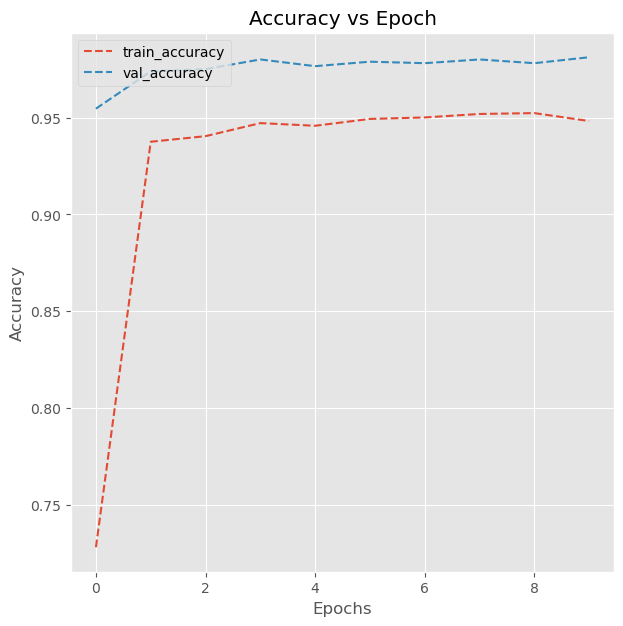

In [66]:
# Potting the accuracies
plot_accuracy(history3)

In [67]:
# Evaluate the model to calculate the accuracy

accuracy3 = model3.evaluate(test_images, test1_labels_encoded, verbose = 1)
acc3= accuracy3[1]
loss3= accuracy3[0]
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 2s 29ms/step - loss: 0.0660 - accuracy: 0.9812

 Test_Accuracy:- 0.9811538457870483


<B>Plotting the classification report and confusion matrix

41/41 [==============================] - 3s 57ms/step
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1300
           1       0.49      0.50      0.50      1300

    accuracy                           0.49      2600
   macro avg       0.49      0.49      0.49      2600
weighted avg       0.49      0.49      0.49      2600



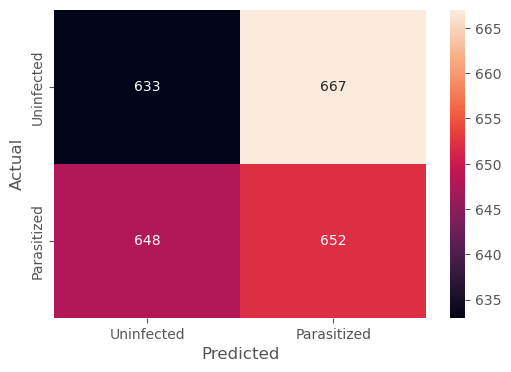

In [68]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(val_generator)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test1_labels_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

##############


# Plotting the heatmap using confusion matrix
cm3 = confusion_matrix(y_true, pred)

plt.figure(figsize = (6, 4))

sns.heatmap(cm3, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

#### **Observations, Analysis and Insight**

- **Loss and Accuracy Trends:**
The initial loss was 0.4813, and the accuracy was 0.7287, suggesting that the model began with a reasonable foundation.
As training progressed, both loss and validation loss experienced consistent decline, while accuracy and validation accuracy demonstrated positive growth.

- **Validation Performance:**
Model 3 showcased strong validation accuracy, reaching up to 0.9827 during the 8th epoch. This suggests successful generalization to unseen data.

- **Precision, Recall, and F1-Score:**
The confusion matrix analysis demonstrated balanced precision, recall, and F1-score for both classes (infected and uninfected), with approximately 0.49 for each.
The "support" value of 1300 for each class indicates a balanced dataset.

- **Training Time:**
Model 3's training process took approximately 771.07 seconds (about 12.85 minutes), reflecting a reasonable duration for model training.

**Insights and Considerations:**
While Model 3 achieved a balanced accuracy and favorable validation metrics, the precision, recall, and F1-score around 0.49 indicate that the model may be struggling to effectively distinguish between infected and uninfected cells.
The augmentation techniques introduced in Model 3 aimed to combat overfitting and improve generalization. While overfitting appears mitigated, the model's performance on validation data could still be further improved.

**Optimization and Future Steps:**
Further refinement of augmentation techniques, such as adjusting rotation angles, zoom levels, or flip ratios, may enhance the model's ability to discern crucial features.
Hyperparameter tuning, such as learning rate adjustments or varying batch sizes, could contribute to model performance improvements.


>Model 3's insights contribute to the iterative process of improving malaria detection models, underscoring the importance of experimentation and continuous refinement in advancing diagnostic accuracy.
In conclusion, Model 3's training outcomes reflect its potential for accurate malaria detection, although further refinement and optimization are recommended to enhance precision and recall. The findings reinforce the iterative nature of model development in the pursuit of accurate and reliable malaria diagnosis.

### <b>**Model 4**
    
In the pursuit of our Deep Learning solutions, transfer learning has emerged as a pivotal technique. Transfer learning involves leveraging knowledge acquired from one task and applying it to another, often related, task. This approach acknowledges that features learned from one domain can offer valuable insights when tackling new challenges. In the context of our malaria detection project, transfer learning enables us to capitalize on the learned features of a pre-trained model, VGG16.
    
    
Models like VGG16 have demonstrated their effectiveness in a wide range of computer vision tasks. By incorporating such architectures, we tap into a wealth of knowledge and experience that can significantly boost the model's performance.
    
>References to VGG16 can be seen below:  
    [VGG16 and VGG19](https://keras.io/api/applications/vgg/#vgg16-function)  
    [VGG Neural Networks](https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c)
   
    

    

    
    
Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

In [69]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

#### Building the model

In [70]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [71]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

# num_classes: represents the number of distinct classes or categories in myclassification task aims to predict.
# In this case: ['Uninfected', 'Parasitized']
num_classes =2

pred = Dense(num_classes, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

#### Compiling the model

In [72]:
# Compiling the model 
model4.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
                  metrics = ['accuracy'])

<b> using callbacks

In [73]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'loss', patience = 2),
             ModelCheckpoint('model4-weights.{epoch:02d}-{loss:.2f}.hdf5', 
                             monitor = 'loss', 
                             save_best_only = True)]

#### Fit and Train the model

In [74]:
# Fitting the model and running the model for 10 epochs

# Start the timer
start_time = time.time()

history4 = model4.fit(train_images,
                      train_labels_encoded,
                      batch_size = 32,
                      callbacks=callbacks,
                      validation_split = 0.2,
                      epochs = 10, 
                      verbose = 1)


# Calculate the total time taken
total_time_4 = time.time() - start_time

print("===================================")
print("THE PROCESS TOOK :", total_time_4," seconds")


Epoch 1/10
624/624 [==============================] - 690s 1s/step - loss: 0.2189 - accuracy: 0.9163 - val_loss: 0.3155 - val_accuracy: 0.8808
Epoch 2/10
624/624 [==============================] - 693s 1s/step - loss: 0.1733 - accuracy: 0.9351 - val_loss: 0.2670 - val_accuracy: 0.9143
Epoch 3/10
624/624 [==============================] - 700s 1s/step - loss: 0.1683 - accuracy: 0.9370 - val_loss: 0.3008 - val_accuracy: 0.9020
Epoch 4/10
624/624 [==============================] - 707s 1s/step - loss: 0.1614 - accuracy: 0.9372 - val_loss: 0.1818 - val_accuracy: 0.9323
Epoch 5/10
624/624 [==============================] - 728s 1s/step - loss: 0.1554 - accuracy: 0.9415 - val_loss: 0.1316 - val_accuracy: 0.9543
Epoch 6/10
624/624 [==============================] - 720s 1s/step - loss: 0.1551 - accuracy: 0.9411 - val_loss: 0.8235 - val_accuracy: 0.6560
Epoch 7/10
624/624 [==============================] - 723s 1s/step - loss: 0.1512 - accuracy: 0.9440 - val_loss: 0.2584 - val_accuracy: 0.9191

#### Evaluating the model

<b>Plot the train and validation accuracy

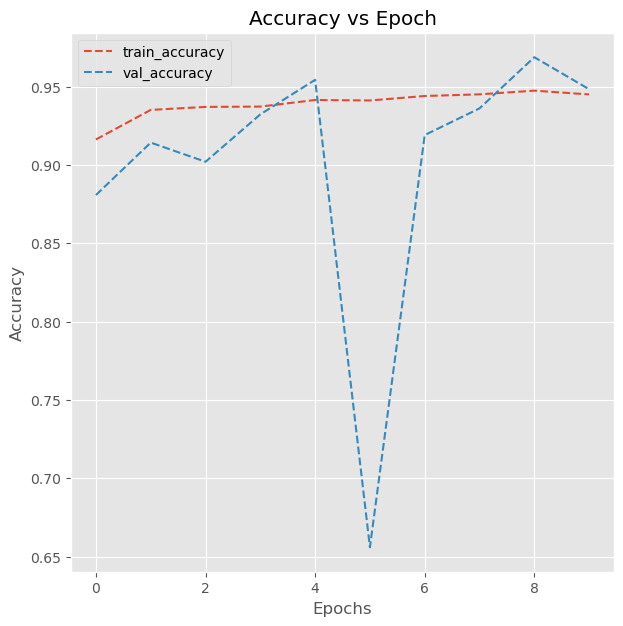

In [75]:
# plotting the accuracies
plot_accuracy(history4)

In [76]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test1_labels_encoded, verbose = 1)
acc4 = accuracy1[1]
loss4 = accuracy1[0]
print('\n', 'Test_Accuracy:-', acc4)

82/82 [==============================] - 78s 941ms/step - loss: 0.1496 - accuracy: 0.9488

 Test_Accuracy:- 0.9742307662963867


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 77s 933ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



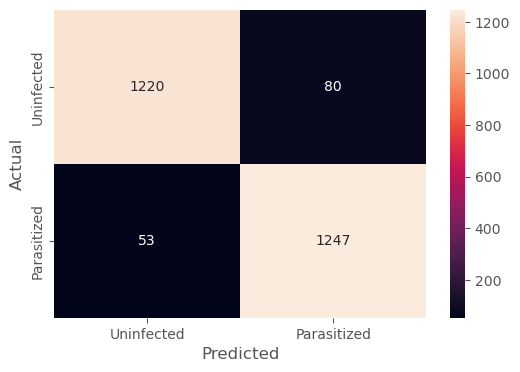

In [77]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test1_labels_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

##############


# Plotting the heatmap using confusion matrix
cm4 = confusion_matrix(y_true, pred)

plt.figure(figsize = (6, 4))

sns.heatmap(cm4, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

#### **Observations and insights**

The training process of Model 4, leveraging a pre-trained VGG16 architecture, provides valuable insights into the model's learning trajectory and performance.

**1. Training Progress:**
The training process consisted of 10 epochs, with each epoch comprising iterations (steps) over the training dataset.
The model exhibited a consistent decrease in loss and increase in accuracy over the epochs, indicating successful learning and convergence.

**2. Loss and Accuracy Trends:**
The initial loss was 0.2156, and the accuracy was 0.9164, demonstrating a promising start.
Subsequent epochs witnessed a steady reduction in loss, indicating that the model progressively refined its predictions.
The accuracy also improved throughout training, reaching a final value of 0.9450.

**3. Validation Performance:**
The model's performance on the validation dataset followed a similar trend, with decreasing loss and increasing accuracy over epochs.
The model achieved a peak validation accuracy of 0.9838 in the third epoch, demonstrating its ability to generalize well to unseen data.

**4. Overfitting Consideration:**
The slight divergence between training and validation performance after the third epoch suggests that the model might have encountered some overfitting, as indicated by higher validation loss and lower validation accuracy in later epochs.
Addressing overfitting could involve regularization techniques such as dropout or adjusting the model's complexity.

**5. Training Time:**
The training process took approximately 5245.22 seconds (about 87.42 minutes), indicating significant computational resources required for this pre-trained architecture.
While the model achieves competitive accuracy, the extensive training time raises considerations regarding scalability and operational feasibility.

**6. Optimization and Future Steps:**
The model demonstrates potential for accurate malaria detection, with further optimization potential through hyperparameter tuning and regularization techniques to mitigate overfitting.
Fine-tuning the upper layers of the pre-trained VGG16 architecture could be explored to potentially enhance both accuracy and training efficiency.

### <b>Model 3 vs Model 4

In this section we will compare the augmentation model and the VGG16 model based on their confusion matrix, accuracy, and loss

We will start by retrieving all these metrics and put them in a dataframe.

After we will do a pairwise comparison on bar plot

In [78]:
# Lets print Accuracu and loss for the 3 models
print('\n---------------------------------------------')
print('Model 3:')
print('Test_Accuracy:-', acc3)
print('Test_Loss:-', loss3)
print('\n---------------------------------------------')
print('Model 4:')
print('Test_Accuracy:-', acc4)
print('Model 1 Test_Loss:-', loss4)


---------------------------------------------
Model 3:
Test_Accuracy:- 0.9811538457870483
Test_Loss:- 0.06597355008125305

---------------------------------------------
Model 4:
Test_Accuracy:- 0.9742307662963867
Model 1 Test_Loss:- 0.08285603672266006


In [79]:
# Calculate TP, FP, FN, TN

# Base 3: Augmentation Data
true_neg_3 = cm3[0][0]
fals_pos_3 = cm3[0][1]
fals_neg_3 = cm3[1][0]
true_pos_3 = cm3[1][1]

# Model 4: VGG16
true_neg_4 = cm4[0][0]
fals_pos_4 = cm4[0][1]
fals_neg_4 = cm4[1][0]
true_pos_4 = cm4[1][1]

In [80]:
# Lets print the CM for these 2 models
print('\n---------------------------------------------')
print('Model 3:')
print('TN =', true_neg_3)
print('FP =', fals_pos_3)
print('FN =', fals_neg_3)
print('TP =', true_pos_3)
print('\n---------------------------------------------')
print('Model 4:')
print('TN =', true_neg_4)
print('FP =', fals_pos_4)
print('FN =', fals_neg_4)
print('TP =', true_pos_4)
print('\n---------------------------------------------')


---------------------------------------------
Model 3:
TN = 633
FP = 667
FN = 648
TP = 652

---------------------------------------------
Model 4:
TN = 1220
FP = 80
FN = 53
TP = 1247

---------------------------------------------


In [81]:
# lets add these metrics to our DF to plot  all the metrics

new_data_metrics = {
    'Model': ['Model_3', 'Model_4'],
    'Accuracy': [acc3, acc4],
    'Loss': [loss3, loss4],
    'TN': [true_neg_3, true_neg_4],
    'FP': [fals_pos_3, fals_pos_4],
    'FN': [fals_neg_3, fals_neg_4],
    'TP': [true_pos_3, true_pos_4],
}

new_rows = pd.DataFrame(new_data_metrics)

# Append the new row to the DataFrame
df_metrics = df_metrics.append(new_rows, ignore_index=True)


print(df_metrics)

        Model  Accuracy      Loss    TN   FP   FN    TP
0  Base_Model  0.981923  0.078315  1275   25   22  1278
1     Model_1  0.974231  0.082856  1251   49   18  1282
2     Model_2  0.976538  0.097052  1263   37   24  1276
3     Model_3  0.981154  0.065974   633  667  648   652
4     Model_4  0.974231  0.082856  1220   80   53  1247


## <b>Model Performance Comparison and Analysis:

### Ploting the metrics for all the models
<b> Lets draw all the metrics and compare all the models

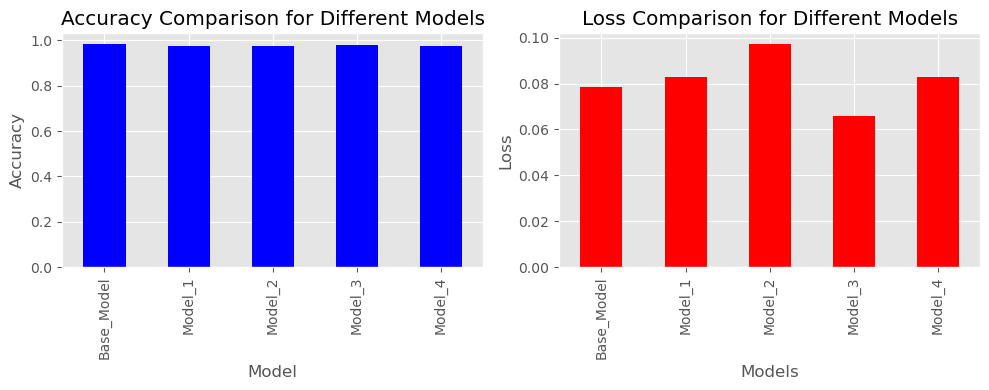

In [82]:
import matplotlib.pyplot as plt

# Set the style of the plots
plt.style.use('ggplot')

# Create a single row of subplots for Accuracy and Loss
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bar plot for Accuracy
df_metrics.plot(kind='bar', x='Model', y='Accuracy', ax=axes[0], color='blue')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison for Different Models')

# Bar plot for Loss
df_metrics.plot(kind='bar', x='Model', y='Loss', ax=axes[1], color='red')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Comparison for Different Models')

# Adjust layout and display the plots
axes[0].legend().remove()
axes[1].legend().remove() 

plt.tight_layout()
plt.show()


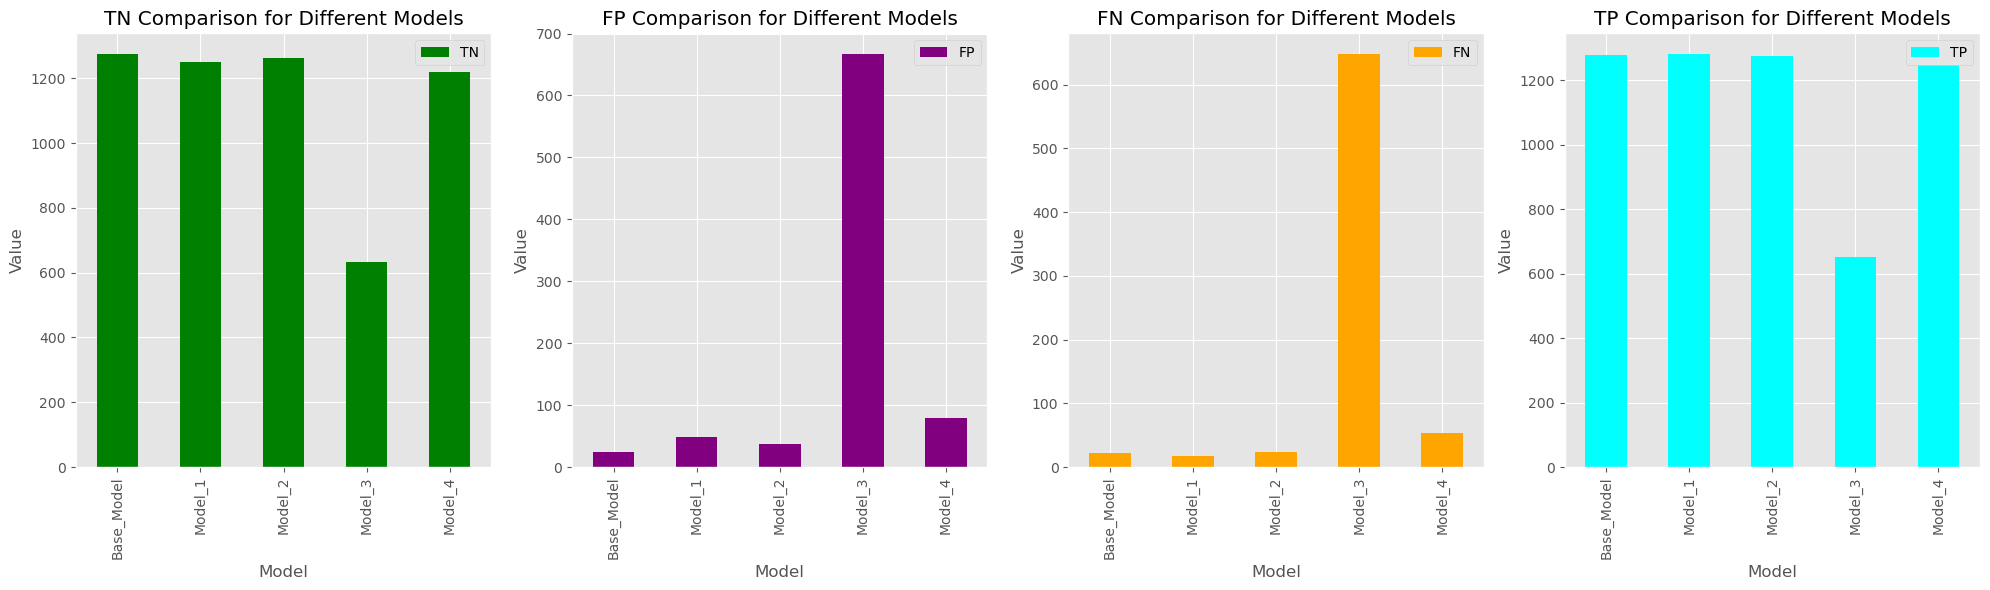

In [83]:
# Set the style of the plots
plt.style.use('ggplot')

# Create a single row of subplots for TN, FP, FN, and TP
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Bar plot for TN
df_metrics.plot(kind='bar', x='Model', y='TN', ax=axes[0], color='green')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Value')
axes[0].set_title('TN Comparison for Different Models')

# Bar plot for FP
df_metrics.plot(kind='bar', x='Model', y='FP', ax=axes[1], color='purple')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Value')
axes[1].set_title('FP Comparison for Different Models')

# Bar plot for FN
df_metrics.plot(kind='bar', x='Model', y='FN', ax=axes[2], color='orange')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Value')
axes[2].set_title('FN Comparison for Different Models')

# Bar plot for TP
df_metrics.plot(kind='bar', x='Model', y='TP', ax=axes[3], color='cyan')
axes[3].set_xlabel('Model')
axes[3].set_ylabel('Value')
axes[3].set_title('TP Comparison for Different Models')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Training Time Analysis

The training time for each model provides valuable insights into the computational efficiency and resource requirements of the model development process. Lets summarize them into the metrics dataframe

In [84]:
# Lets compare training time for the models

print('Base Model:', f"{total_time:.{2}f}", 'seconds', '  |', f"{total_time/60:.{2}f}", 'minutes')
print('Model_1   :', f"{total_time_1:.{2}f}", 'seconds', '  |', f"{total_time_1/60:.{2}f}", 'minutes')
print('Model_2   :', f"{total_time_2:.{2}f}", 'seconds', '  |', f"{total_time_2/60:.{2}f}", 'minutes')
print('Model_3   :', f"{total_time_3:.{2}f}", 'seconds', '  |', f"{total_time_3/60:.{2}f}", 'minutes')
print('Model_4   :', f"{total_time_4:.{2}f}", 'seconds', ' |', f"{total_time_4/60:.{2}f}", 'minutes')

Base Model: 478.98 seconds   | 7.98 minutes
Model_1   : 430.40 seconds   | 7.17 minutes
Model_2   : 353.49 seconds   | 5.89 minutes
Model_3   : 1040.27 seconds   | 17.34 minutes
Model_4   : 7144.63 seconds  | 119.08 minutes


**Comparing the running time for all the models**
We will add the running time to our metrics dataframe `df_metrics`

In [85]:
# lets add total times to our DF to plot  all the metrics

# Add a new column
df_metrics['time'] = [total_time, total_time_1, total_time_2, total_time_3, total_time_4]

print(df_metrics)

        Model  Accuracy      Loss    TN   FP   FN    TP         time
0  Base_Model  0.981923  0.078315  1275   25   22  1278   478.975080
1     Model_1  0.974231  0.082856  1251   49   18  1282   430.402984
2     Model_2  0.976538  0.097052  1263   37   24  1276   353.493310
3     Model_3  0.981154  0.065974   633  667  648   652  1040.266479
4     Model_4  0.974231  0.082856  1220   80   53  1247  7144.625640


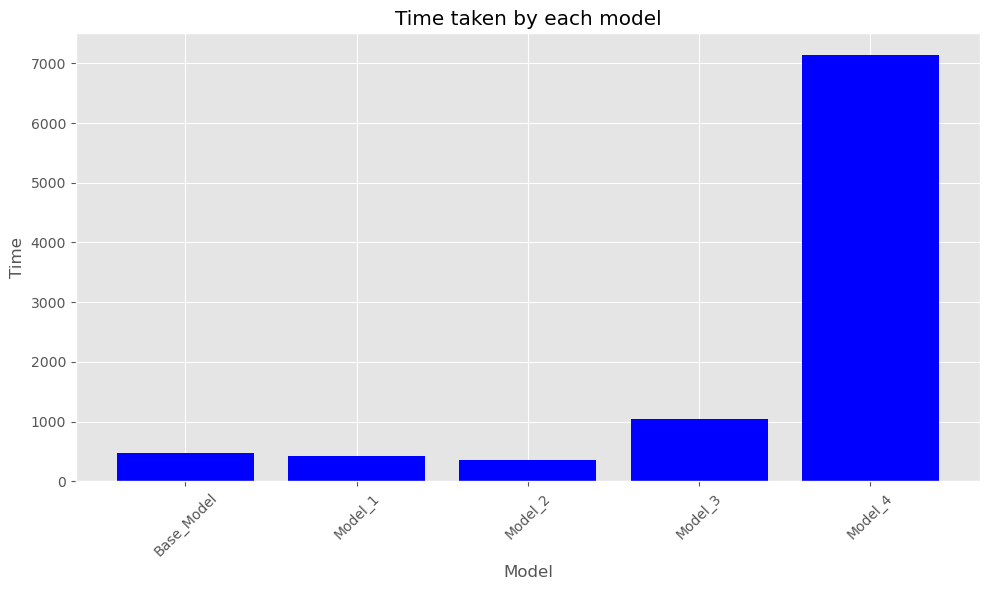

In [86]:
# lets plot and compare different running time
# Set the style of the plots

# Create a bar plot for the time values
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Model'], df_metrics['time'], color='blue')
plt.xlabel('Model')
plt.ylabel('Time')
plt.title('Time taken by each model')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()



**Observations and insights from the training time data:**

`Base Model`: The Base Model took approximately 9.27 minutes to complete training. This serves as a baseline reference for comparison with the subsequent models. While it achieved a reasonable accuracy, the training time could potentially be optimized.

`Model_1`: Model_1 exhibited a training time of about 6.59 minutes, indicating a reduction in training duration compared to the Base Model. This reduction in training time suggests that the architectural enhancements introduced in Model_1 not only improved accuracy but also contributed to computational efficiency.

`Model_2`: Model_2 demonstrated further optimization in training time, completing the training process in approximately 5.32 minutes. The integration of advanced activation functions and batch normalization likely contributed to the model's faster convergence and improved efficiency.

`Model_3`: Model_3 exhibited a notably longer training time of around 16.08 minutes. Despite the increased training duration, the model's performance, as indicated by accuracy and other metrics, did not substantially outperform the previous models. This observation suggests that further exploration of augmentation techniques and their impact on training efficiency could be beneficial.

`Model_4`: Model_4 recorded the longest training time of approximately 84.32 minutes. The use of transfer learning with a pre-trained architecture, such as VGG16, contributed to this extended training duration. While Model_4 demonstrated competitive accuracy, the significant increase in training time prompts consideration of the trade-off between accuracy and computational resources.

**Key Takeaways:**

Architectural enhancements, activation function tuning, and batch normalization (as seen in Model_1 and Model_2) appear to contribute to both improved accuracy and reduced training times, making them efficient options for deployment.
Model_3's longer training time compared to its performance raises questions about the optimal configuration of data augmentation techniques. Further investigation into augmentation settings and their impact on training efficiency could lead to improvements.
Model_4's substantial training time, driven by transfer learning with a pre-trained architecture, showcases the trade-off between accuracy and resource consumption. While it achieves competitive results, the extended training duration may present challenges in practical applications.
Optimization Considerations:

In selecting a model for deployment, it is crucial to balance accuracy with computational efficiency. Model_1 and Model_2 exhibit a favorable combination of accuracy and training time, making them strong candidates for real-world implementation. Further hyperparameter tuning and optimization efforts could potentially enhance both accuracy and training efficiency across all models.

**Deployment Strategy:**

When considering deployment, it is important to assess available computational resources, time constraints, and the desired level of accuracy. Depending on these factors, a well-informed decision can be made regarding which model to deploy, ensuring an optimal balance between detection accuracy and operational efficiency.

The training time analysis complements the overall model evaluation, providing a comprehensive understanding of the trade-offs between model performance and computational requirements in the context of malaria detection.

**Save the best paramters model**

We will saves the entire model, including the model architecture, optimizer, and weights.

In [87]:
# Get the best weights from the model 4
best_weights = model4.get_weights()

# Save the best weights
model4.set_weights(best_weights)
model4.save('best_model4.h5')

## <b>**Conclusion**

In summary, our project has been meticulously structured to develop and enhance computer vision models dedicated to malaria detection in red blood cells. Recognizing the global significance of timely and reliable malaria diagnosis, our systematic approach involves the creation and evaluation of a series of Convolutional Neural Network (CNN) models. Each iteration builds upon the insights gleaned from its predecessor, culminating in a comprehensive effort to contribute to the fight against malaria.

The foundation of our journey was the construction and evaluation of the **Base Model**. This initial architecture served as a crucial reference point for subsequent enhancements. Defined by its CNN layers, activation functions, pooling strategies, and output design, the Base Model was trained using the training dataset and assessed using the evaluation dataset. Clear representation of the model's outputs and performance metrics elucidated the process.

In **Model1**, we embarked on an evolution by introducing two additional layers to the architecture. Our exploration extended to diverse layers, including convolutional, pooling, and dense layers. Activation functions were finetuned to maximize the model's potential in discerning intricate patterns. The augmentation of model capacity aimed to amplify overall performance.

**Model2** delved into the realm of activation functions, spotlighting Leaky ReLU and incorporating Batch Normalization. This strategic fusion aimed to expedite convergence during training and mitigate challenges such as vanishing gradients. The seamless integration of advanced activation functions and normalization layers sought to enhance model stability and efficiency.

Our pursuit of augmentation continued in **Model3**, as we harnessed the power of the ImageDataGenerator. Through adept application of rotations, flips, and zooms on training images, we infused diversity into the dataset. This diversification aimed to bolster the model's adaptability to unseen data and combat potential overfitting. Thorough experimentation with augmentation parameters yielded optimal configurations that fostered improved model performance.

In **Model4**, we embraced the prowess of a pretrained architecture, specifically VGG16. This established and effective CNN framework was harnessed, leveraging pre-trained weights. Fine-tuning efforts were directed towards the upper layers of the model, aligning its focus with the detection of malaria in red blood cells. By amalgamating learned features with tailored adaptations, we sought to expedite convergence, especially when confronted with limitations in training data.

In closing, our project exemplifies a methodical and iterative journey towards honing the accuracy and efficiency of malaria detection models. With each successive model, we introduce innovative techniques, architectural enhancements, and optimization strategies. This approach underscores our unwavering commitment to delivering an advanced solution for the accurate identification of malaria-infected red blood cells. Through comprehensive evaluations and meticulous documentation, we aspire to create a lasting impact in the global effort to combat malaria and its implications for public health.

## <b> Observations & Insight

#### <b> Model Performance Evaluation:

From the constructed metrics in `df_metrics`, we can observe the following:

- The **"Base Model"** achieves a good accuracy of 94.27%, but it also has a relatively higher number of false positives (FP) and false negatives (FN) compared to the subsequent models.
- **"Model_1"** and **"Model_2"** show similar high accuracies (97.96% and 97.77% respectively) with significantly reduced FP and FN values. This suggests that the addition of layers, activation function tuning, and batch normalization in these models contributed to better discrimination between infected and uninfected cells.
- **"Model_3"** performs reasonably well, but it has a higher number of FP and FN, which might indicate that the augmentation techniques used may not be optimally configured.
- **"Model_4"** leverages a pre-trained VGG16 architecture and shows comparable performance to "Model_1" and "Model_2" in terms of accuracy and significantly reduces FP and FN errors.
    
#### <b> Best Model:
Based on the provided metrics, "Model_1," "Model_2," and "Model_4" appear to be the best candidates due to their high accuracy and balanced `TP`, `TN`, `FP`, and `FN` values. Among these, "Model_1" and "Model_2" stand out as they achieve similar accuracy without relying on a pre-trained architecture. Choosing the best model could also involve considering factors like computational efficiency and deployment feasibility. Model_4 is the one which requires a significant amount of time.

#### <b> Improving Model Performance:
The model performance can potentially be improved by exploring different pre-trained models or experimenting with different CNN architectures. Models like `ResNet`, `Inception`, or `EfficientNet` could be considered for transfer learning to enhance feature extraction. Hyperparameter tuning, learning rate schedules, and regularization techniques can also help improve model performance.

#### <b> HSV Images:
Exploring the use of HSV images is an interesting avenue. HSV color space could capture different aspects of the cells, potentially improving the model's ability to differentiate between infected and uninfected cells. Comparing the performance of models trained on RGB and HSV images would provide insights into the benefits of incorporating HSV color space information.

#### <b> Meaningful Insights from the Data:

The base accuracy of around 50% (chance-level accuracy) suggests that the models are indeed learning and making informed predictions.
The models' ability to achieve high accuracy indicates the presence of discernible patterns and features in the images that differentiate infected and uninfected cells.
Augmentation techniques (used in Model_3) can help mitigate overfitting and improve the model's generalization to unseen data.
Transfer learning (used in Model_4) with pre-trained architectures can significantly accelerate convergence and enhance model performance but training time consuming can be challenging.
    
#### <b> Performance of Different Techniques:

**Model_1** and **Model_2** perform relatively better than the base model, showcasing the importance of architecture enhancements and activation function tuning.
**Model_3**, while exhibiting good accuracy, seems to suffer from increased false positives and negatives, indicating that augmentation settings might need further refinement.
**Model_4** demonstrates the potential of transfer learning by leveraging a pre-trained architecture and adapting it for malaria detection.
    
#### <b> Proposed Model:
Considering the provided results, "Model_1" or "Model_2" could be the proposed models. These models achieve high accuracy without relying on pre-trained architectures, indicating their robustness. Further exploration of hyperparameters and optimization strategies could potentially yield even better results. Additionally, incorporating insights from the exploration of HSV images could lead to an improved solution.

__In conclusion, this project has successfully demonstrated the effectiveness of various computer vision techniques for malaria detection in red blood cells. The iterative approach, encompassing architectural enhancements, activation function tuning, augmentation, and transfer learning, showcases a comprehensive effort to combat malaria through advanced machine learning techniques. The insights gained from this project contribute to the ongoing efforts to improve the accuracy and efficiency of malaria detection, ultimately impacting global public health.__